# Implementation of GARCH

In [1]:
import pyforest
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Importing the stationary dataset  

In [2]:
df = pd.read_csv('../Data/stationary_data.csv')
df.set_index(pd.to_datetime(df.date),inplace=True, drop=True)
df.drop('date', axis=1, inplace=True)
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,VIX,btc_google_search,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,OVOL
date,,,,,,,,,,,,,,
2015-01-16,-1.294149,0.935573,1.273613,1.110756,0.637380,3.886673,0.600889,-0.646332,-0.003131,0.104633,0.196728,0.070873,0.030712,0.004455
2015-01-20,0.787482,0.958341,-0.991337,0.108611,0.637007,3.887913,0.465880,-0.646332,0.002148,0.108092,-0.157754,0.008293,-0.079850,0.002351
2015-01-21,1.577742,0.056560,0.645252,0.378296,0.760103,3.919137,0.333418,-0.646332,0.004404,0.008647,0.098364,0.025355,0.000000,0.002763
2015-01-22,0.008662,0.894687,-1.139657,1.265460,0.798435,3.940048,0.021369,-0.646332,0.000204,0.102039,-0.178169,0.082213,-0.061513,-0.016472
2015-01-23,0.700360,-0.610587,-0.399885,-0.491298,1.367737,3.924160,0.054484,-0.646332,0.002183,-0.065720,-0.062174,-0.030018,0.000000,0.026813


### Create datasets of Daily returns and Volatilities
THe GARCH will be implemented on the daily returns and compared with the respective volatilities

In [16]:
_returns = df[['btc_dr', 'gold_dr', 'oil_dr', 'sp500_dr']]
_volatilities = df[['BVOL', 'GVOL', 'OVOL', 'VIX']]

###  Check the daily returns plot. If the variance is quite fluctuating, maybe it's time to try GARCH model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

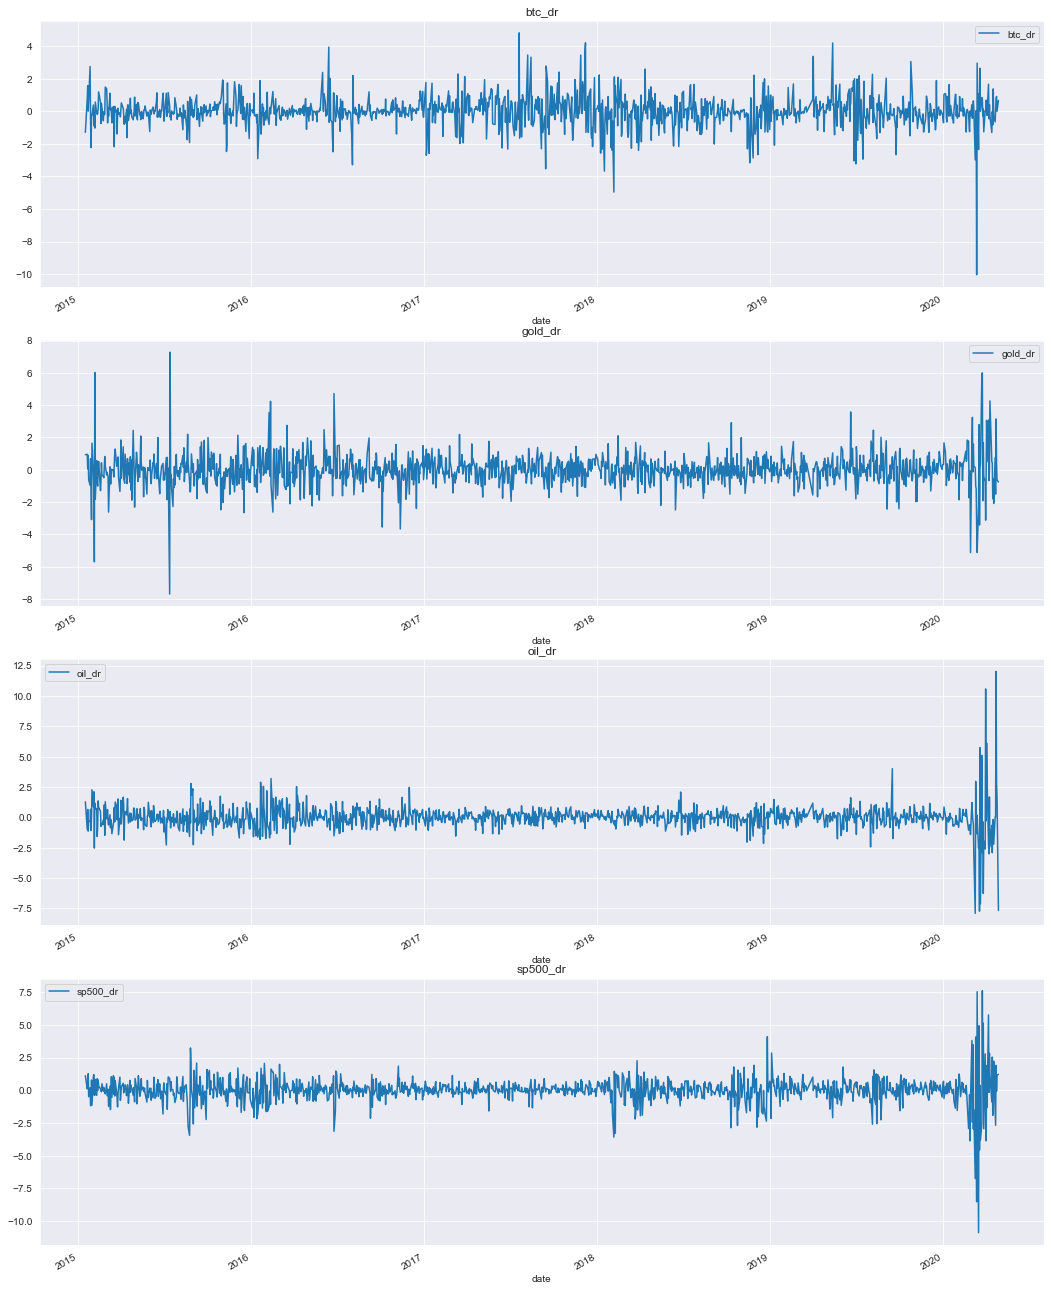

In [4]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows=4, ncols=1, figsize = (18, 25))
i = 0
for feature in _returns:
    df[feature].plot(kind = 'line', legend = 'reverse', title = '{}'.format(feature), ax =ax[i])
    i += 1

### To know the value of p and q parameters in GARCH, plot the pacf graph. The number of points above the darker region will tell us the value of q we should go for. Then value of q will be selected on the basis of p value of the model

<IPython.core.display.Javascript object>

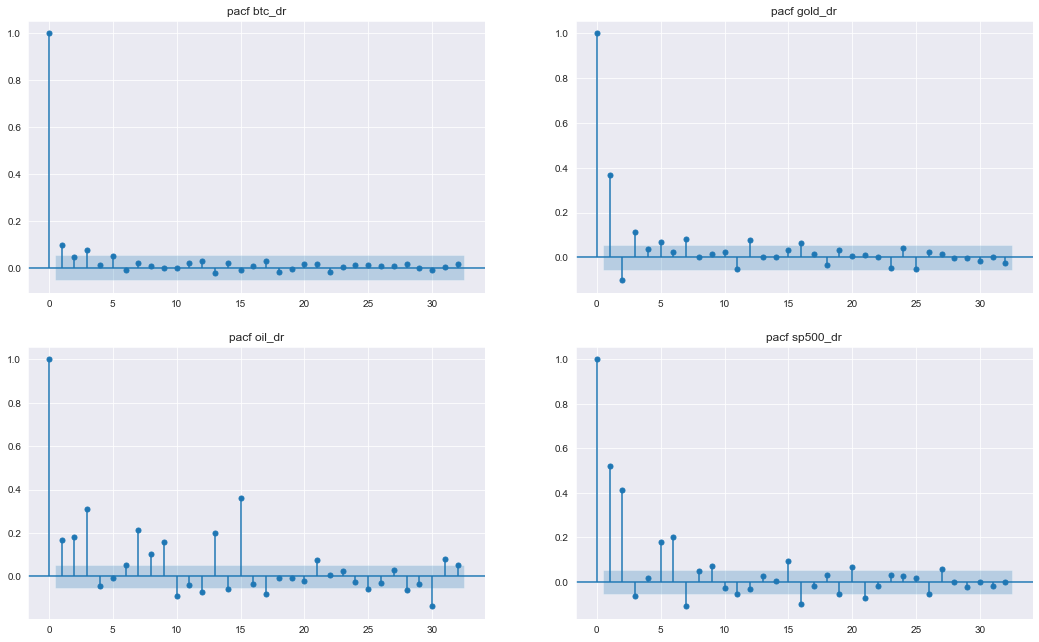

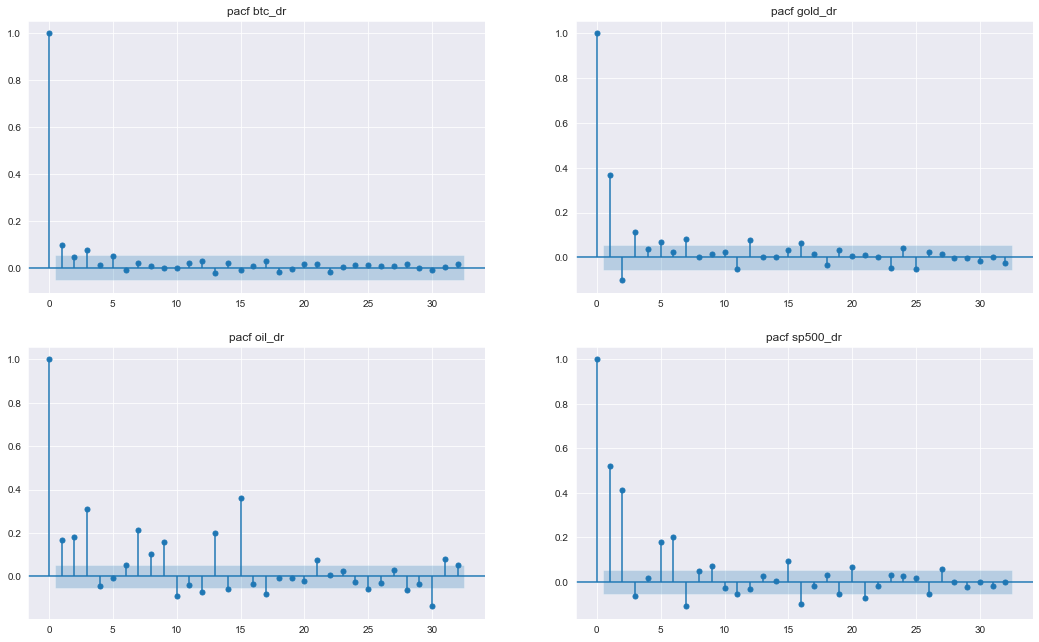

In [5]:
fig2, ax2 = plt.subplots(nrows=2, ncols=2, figsize = (18, 11))
plot_pacf(df['btc_dr']**2, title = 'pacf btc_dr', ax=ax2[0,0])
plot_pacf(df['gold_dr']**2, title = 'pacf gold_dr', ax=ax2[0,1])
plot_pacf(df['oil_dr']**2, title = 'pacf oil_dr', ax=ax2[1,0])
plot_pacf(df['sp500_dr']**2, title = 'pacf sp500_dr', ax=ax2[1,1])

In [6]:
_volatilities.head()

,BVOL,GVOL,OVOL,VIX
date,,,,
2015-01-16,0.637380,3.886673,0.004455,0.600889
2015-01-20,0.637007,3.887913,0.002351,0.465880
2015-01-21,0.760103,3.919137,0.002763,0.333418
2015-01-22,0.798435,3.940048,-0.016472,0.021369
2015-01-23,1.367737,3.924160,0.026813,0.054484


In [7]:
_volatilities.shape

(1320, 4)

In [8]:
n_test = 264
vol_train, vol_test = _volatilities[:-n_test], _volatilities[-n_test:]
r_train, r_test = _returns[:-n_test], _returns[-n_test:]

In [9]:
model_BTC = arch_model(r_train['btc_dr'], mean='Zero', vol='GARCH', p=1, q=1)
model_Gold = arch_model(r_train['gold_dr'], mean='Zero', vol='GARCH', p=1, q=0)
model_Oil = arch_model(r_train['oil_dr'], mean='Zero', vol='GARCH', p=3, q=0)
model_SP500 = arch_model(r_train['sp500_dr'], mean='Zero', vol='GARCH', p=1, q=2)

In [10]:
print("### BTC : ")
BTC_fit = model_BTC.fit()
print("### Gold : ")
Gold_fit = model_Gold.fit()
print("### Oil : ")
Oil_fit = model_Oil.fit()
print("### SP500 : ")
SP500_fit = model_SP500.fit()

### BTC : 
Iteration:      1,   Func. Count:      5,   Neg. LLF: 5224.595309516426
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1797.2079346294138
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1546.5709086438214
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1291.5419170981668
Iteration:      5,   Func. Count:     32,   Neg. LLF: 1290.655692973859
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1290.6551007067615
Iteration:      7,   Func. Count:     40,   Neg. LLF: 1290.6550438454326
Iteration:      8,   Func. Count:     43,   Neg. LLF: 1290.6550438457493
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1290.6550438454326
            Iterations: 8
            Function evaluations: 43
            Gradient evaluations: 8
### Gold : 
Iteration:      1,   Func. Count:      4,   Neg. LLF: 2196.350358852631
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1423.965608471847
Iteration:      3,   Func. Count:     15,  

### Let's compare the predicted volatilites and  actual Daily returns. Remember more fluctuations in daily returns, more the volatilty

In [11]:
yhat = BTC_fit.forecast(horizon=n_test)
btc_var_pred = pd.DataFrame(yhat.variance.values[-1,:], index=r_test.index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

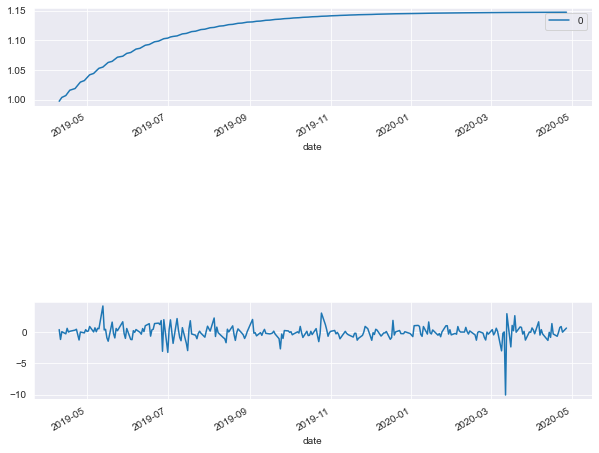

In [12]:
fig3, ax3 = plt.subplots(nrows=2, ncols=1, figsize = (10,8))
fig3.subplots_adjust(hspace=2)
btc_var_pred.plot(ax=ax3[0])
r_test['btc_dr'].plot(ax=ax3[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

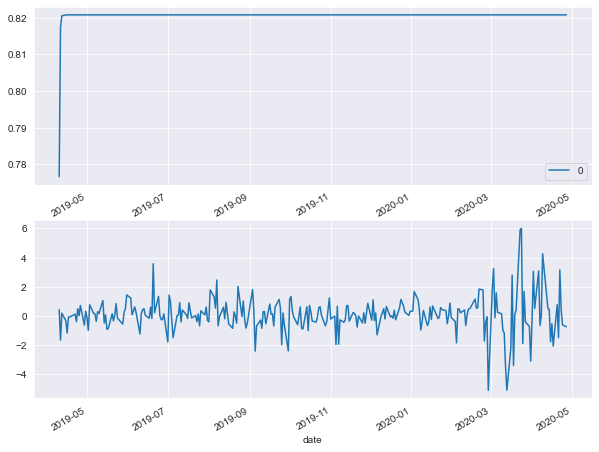

In [13]:
yhat = Gold_fit.forecast(horizon=n_test)
gold_var_pred = pd.DataFrame(yhat.variance.values[-1,:], index=r_test.index)

fig4, ax4 = plt.subplots(nrows=2, ncols=1, figsize = (10,8))
fig3.subplots_adjust(hspace=2)
gold_var_pred.plot(ax=ax4[0])
r_test['gold_dr'].plot(ax=ax4[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

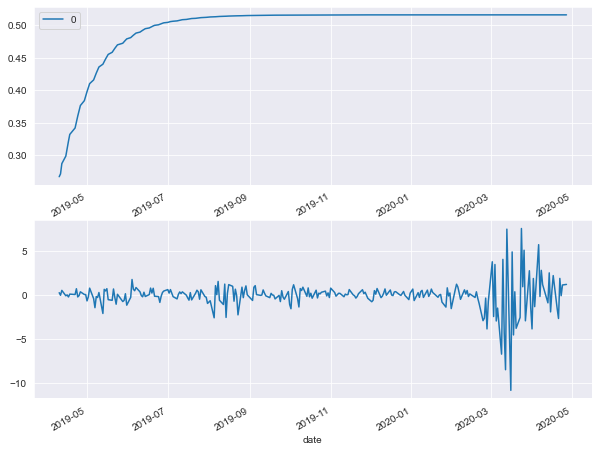

In [14]:
yhat = SP500_fit.forecast(horizon=n_test)
sp500_var_pred = pd.DataFrame(yhat.variance.values[-1,:], index=r_test.index)

fig5, ax5 = plt.subplots(nrows=2, ncols=1, figsize = (10,8))
fig3.subplots_adjust(hspace=2)
sp500_var_pred.plot(ax=ax5[0])
r_test['sp500_dr'].plot(ax=ax5[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date'>

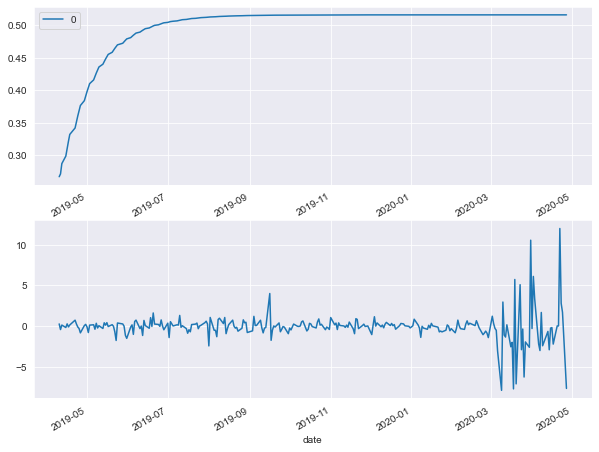

In [15]:
yhat = SP500_fit.forecast(horizon=n_test)
oil_var_pred = pd.DataFrame(yhat.variance.values[-1,:], index=r_test.index)

fig6, ax6 = plt.subplots(nrows=2, ncols=1, figsize = (10,8))
fig3.subplots_adjust(hspace=2)
oil_var_pred.plot(ax=ax6[0])
r_test['oil_dr'].plot(ax=ax6[1])

### Clearly the daily returns during the Pandemic in 2020 dominates the affect, that's why the volatility graph is just increasing.